## Enviornment Setting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
import folium
import matplotlib.colors as mcolors
import scipy.stats as stats

In [2]:
np.random.seed(42)

## Data

In [3]:
hospital=pd.read_csv('세종 소아과 가중치 데이터.csv')

In [4]:
hospital

,의료기관명,의료기관 분류,의료기관 주소,district,Latitude,Longitude,비대면진료,소아과전문의,야간진료,일요일진료
0,세종하이한방병원,한방병원,세종특별자치시 갈매로 58,NaN,36.471035,127.275442,NaN,NaN,NaN,NaN
1,서울현병원,병원,세종특별자치시 나성북로 15,NaN,36.489731,127.258401,NaN,NaN,NaN,NaN
2,아름드리나무 어린이병원,소아과,세종특별자치시 보듬3로 101,아름동,36.511399,127.248417,1.0,1.0,0.0,0.0
3,밝은한방병원,한방병원,세종특별자치시 한누리대로 2264,NaN,36.473003,127.276788,NaN,NaN,NaN,NaN
4,세종경희한방병원,한방병원,세종특별자치시 대평4길 17,NaN,36.473257,127.275975,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
446,이종선치과의원,치과의원,세종특별자치시 조치원읍 조치원로 31,NaN,36.601761,127.300083,NaN,NaN,NaN,NaN
447,황용보건진료소,보건진료소,세종특별자치시 금남면 금남구즉로 487,NaN,36.480370,127.329333,NaN,NaN,NaN,NaN
448,양곡보건진료소,보건진료소,세종특별자치시 전의면 양지편길 17,NaN,36.640261,127.177879,NaN,NaN,NaN,NaN
449,송학보건진료소,보건진료소,세종특별자치시 장군면 황미창말길 5-4,NaN,36.538151,127.190235,NaN,NaN,NaN,NaN


In [5]:
hos_feature=pd.DataFrame(columns=hospital.columns)

In [6]:
for idx in hospital.index:
    type=hospital.loc[idx, '의료기관 분류']
    if type=='소아과':
        hos_feature = pd.concat([hos_feature, hospital.loc[[idx]]], ignore_index=True)

In [7]:
hos_feature

,의료기관명,의료기관 분류,의료기관 주소,district,Latitude,Longitude,비대면진료,소아과전문의,야간진료,일요일진료
0,아름드리나무 어린이병원,소아과,세종특별자치시 보듬3로 101,아름동,36.511399,127.248417,1.0,1.0,0.0,0.0
1,코난소아청소년과의원,소아과,세종특별자치시 남세종로 73,집현동,36.480141,127.301462,0.0,1.0,0.0,0.0
2,꿈담소아청소년과의원,소아과,세종특별자치시 마음로 264,고운동,36.519328,127.234660,0.0,1.0,0.0,0.0
3,손근형소아청소년과의원,소아과,세종특별자치시 나성북로 30,나성동,36.490171,127.259425,0.0,1.0,0.0,0.0
4,윤빛소아청소년과의원,소아과,세종특별자치시 해밀3로 43,해밀동,36.528845,127.264985,0.0,1.0,0.0,0.0
5,세종꾸러기소아치과의원,소아과,세종특별자치시 한누리대로 2012,소담동,36.485296,127.299864,0.0,1.0,0.0,0.0
6,하늘소아청소년과의원,소아과,세종특별자치시 한누리대로 1820,반곡동,36.498115,127.313261,1.0,1.0,0.0,0.0
7,로뎀소아청소년과의원,소아과,세종특별자치시 다정중앙로 52,다정동,36.495177,127.249255,1.0,1.0,0.0,0.0
8,다정소아청소년과의원,소아과,세종특별자치시 다정북로 109,다정동,36.497534,127.242648,1.0,1.0,0.0,0.0
9,도란도란소아청소년과의원,소아과,세종특별자치시 다정중앙로 57,다정동,36.495624,127.248519,1.0,1.0,0.0,0.0


In [8]:
school_feature=pd.read_csv('학군 가중치.csv')
center_feature=pd.read_csv('복지센터 가중치.csv')

In [9]:
apt_feature=pd.read_csv("아파트 가중치.csv")

In [10]:
apt_feature

,Unnamed: 0,의료기관명,아파트단지
0,0,아름드리나무 어린이병원,28
1,1,코난소아청소년과의원,18
2,2,꿈담소아청소년과의원,15
3,3,손근형소아청소년과의원,44
4,4,윤빛소아청소년과의원,6
5,5,세종꾸러기소아치과의원,28
6,6,하늘소아청소년과의원,8
7,7,로뎀소아청소년과의원,33
8,8,다정소아청소년과의원,15
9,9,도란도란소아청소년과의원,28


In [11]:
population=pd.read_csv('세종시 인구 최종.csv')
population

,Unnamed: 0,의료기관명,의료기관 분류,의료기관 주소,district,Latitude,Longitude,비대면진료,소아과전문의,야간진료,일요일진료,어린이 인구수,조출생률,I
0,0,아름드리나무 어린이병원,소아과,세종특별자치시 보듬3로 101,아름동,36.511399,127.248417,1.0,1.0,0.0,0.0,6644.0,6.620239,-3.568481
1,1,코난소아청소년과의원,소아과,세종특별자치시 남세종로 73,집현동,36.480141,127.301462,0.0,1.0,0.0,0.0,7370.0,13.834061,-6.724017
2,2,꿈담소아청소년과의원,소아과,세종특별자치시 마음로 264,고운동,36.519328,127.234660,0.0,1.0,0.0,0.0,10166.0,7.533748,-6.541422
3,3,손근형소아청소년과의원,소아과,세종특별자치시 나성북로 30,나성동,36.490171,127.259425,0.0,1.0,0.0,0.0,3258.0,7.063882,-4.504607
4,4,윤빛소아청소년과의원,소아과,세종특별자치시 해밀3로 43,해밀동,36.528845,127.264985,0.0,1.0,0.0,0.0,5653.0,12.419355,-8.117742
5,5,세종꾸러기소아치과의원,소아과,세종특별자치시 한누리대로 2012,소담동,36.485296,127.299864,0.0,1.0,0.0,0.0,5645.0,10.142176,-2.842819
6,6,하늘소아청소년과의원,소아과,세종특별자치시 한누리대로 1820,반곡동,36.498115,127.313261,1.0,1.0,0.0,0.0,7370.0,13.834061,-6.724017
7,7,로뎀소아청소년과의원,소아과,세종특별자치시 다정중앙로 52,다정동,36.495177,127.249255,1.0,1.0,0.0,0.0,7766.0,8.569194,-4.284028
8,8,다정소아청소년과의원,소아과,세종특별자치시 다정북로 109,다정동,36.497534,127.242648,1.0,1.0,0.0,0.0,7766.0,8.569194,-4.284028
9,9,도란도란소아청소년과의원,소아과,세종특별자치시 다정중앙로 57,다정동,36.495624,127.248519,1.0,1.0,0.0,0.0,7766.0,8.569194,-4.284028


## MinxMaxScaler (0~1)

In [12]:
def scale_features(df, features):
    """
    Scale the specified features in the DataFrame.

    Parameters:
    - df (pd.DataFrame): 데이터프레임
    - features (list): 스케일링할 feature들의 리스트
    - method (str): 스케일링 방법 ('standard' 또는 'minmax')

    Returns:
    - pd.DataFrame: 스케일링된 데이터프레임
    """
    df_scaled = df.copy()  # 원본 데이터 유지

    scaler=MinMaxScaler()

    # 지정한 feature들만 스케일링
    df_scaled[features] = scaler.fit_transform(df[features])

    return df_scaled

In [13]:
scaled_school=scale_features(school_feature, features=['학군'])

In [14]:
scaled_center=scale_features(center_feature, features=['복지센터'])

In [15]:
scaled_apt=scale_features(apt_feature, features=['아파트단지'])

In [16]:
scaled_pop=scale_features(population, features=['어린이 인구수'])
scaled_birth=scale_features(population, features=['조출생률'])
scaled_sup=scale_features(population, features=['I'])

## Elbow 기법으로 최적의 k 찾기

In [49]:
# feature: 비대면 진료, 야간진료, 일요일 진료, 학군, 복지센터

features = pd.DataFrame({
    'Untact': hos_feature['비대면진료'],
    'Night': hos_feature['야간진료'],
    'Sunday': hos_feature['일요일진료'],
    'School': scaled_school['학군'],
    'Carecenter': scaled_center['복지센터'],
    'Apt': scaled_apt['아파트단지'],
    'Population': scaled_pop['어린이 인구수'],
    'Birth': scaled_birth['조출생률'],
    'I': scaled_sup['I']
})

In [50]:
features

,Untact,Night,Sunday,School,Carecenter,Apt,Population,Birth,I
0,1.0,0.0,0.0,0.687500,0.4,0.578947,0.490156,0.335514,0.862432
1,0.0,0.0,0.0,0.312500,0.4,0.315789,0.595252,1.000000,0.264217
2,0.0,0.0,0.0,0.218750,0.0,0.236842,1.000000,0.419660,0.298833
3,0.0,0.0,0.0,0.375000,0.6,1.000000,0.000000,0.376379,0.684965
4,0.0,0.0,0.0,0.000000,0.0,0.000000,0.346699,0.869687,0.000000
5,0.0,0.0,0.0,0.390625,0.2,0.578947,0.345541,0.659930,1.000000
6,1.0,0.0,0.0,0.078125,0.2,0.052632,0.595252,1.000000,0.264217
7,1.0,0.0,0.0,0.781250,0.4,0.710526,0.652577,0.515038,0.726781
8,1.0,0.0,0.0,0.718750,0.6,0.236842,0.652577,0.515038,0.726781
9,1.0,0.0,0.0,0.750000,0.6,0.578947,0.652577,0.515038,0.726781


C:\Users\dknmk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dknmk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dknmk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

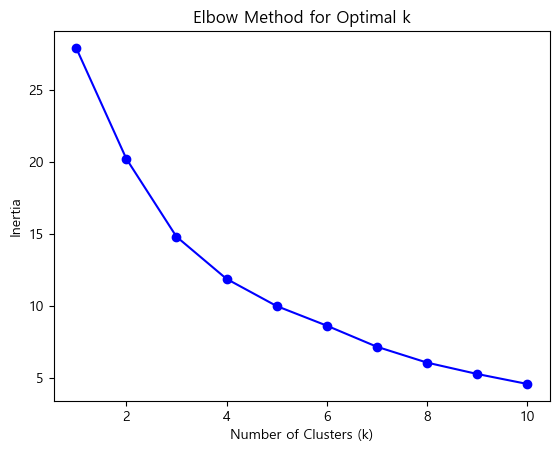

In [51]:
# 엘보우 기법을 사용하여 최적의 k 찾기
inertia_values = []
k_range = range(1, 11)  # k의 범위 설정

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia_values.append(kmeans.inertia_)  # 관성 값 저장

# Elbow plot 그리기
plt.plot(k_range, inertia_values, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

## 실루엣 계수 평가

C:\Users\dknmk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dknmk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dknmk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

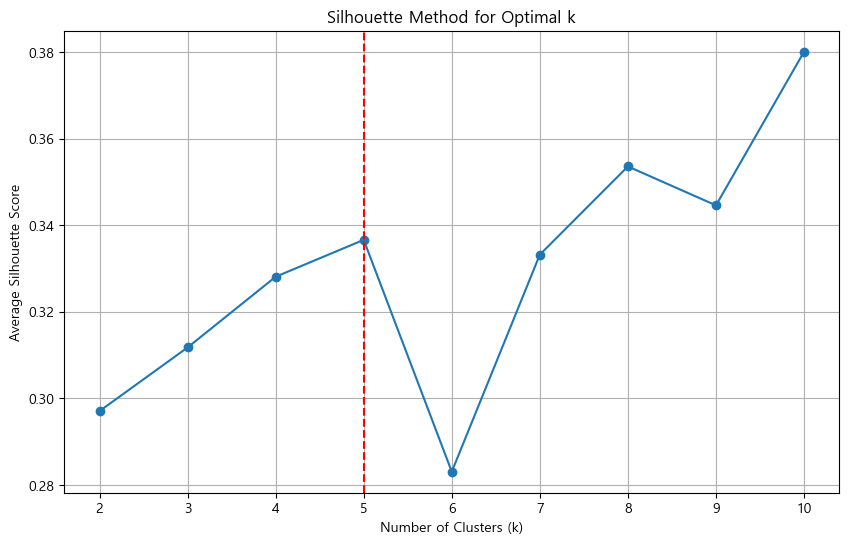

In [52]:
# 다양한 k 값에 대한 평균 실루엣 계수 계산
np.random.seed(42)

silhouette_avgs = []
k_values = range(1, 11)

for k in k_values[1:]:  # k=1은 의미가 없음
    kmeans = KMeans(n_clusters=k)
    cluster_labels = kmeans.fit_predict(features)
    silhouette_avg = silhouette_score(features, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(k_values[1:], silhouette_avgs, marker='o')
plt.title('Silhouette Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.xticks(k_values[1:])
plt.grid()
plt.axvline(x=5, color='red', linestyle='--', label='Optimal k')
plt.show()


## 주성분 분석

In [53]:
pca = PCA()
X_pca = pca.fit_transform(features)

# KMeans 클러스터링
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_pca)

C:\Users\dknmk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [54]:
explained_variance = pca.explained_variance_ratio_

In [55]:
explained_variance

array([0.32132057, 0.26682828, 0.13137675, 0.09025757, 0.07268604,
       0.04449735, 0.03307651, 0.02503484, 0.0149221 ])

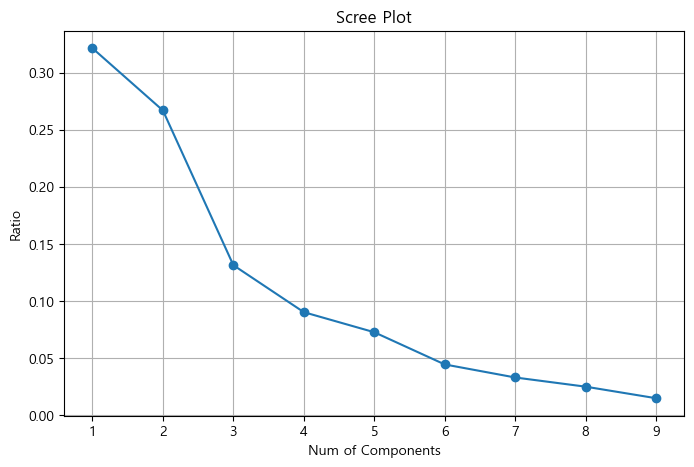

주성분 개수: 4


In [56]:
explained_variance = pca.explained_variance_ratio_

# Scree Plot 그리기
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Scree Plot')
plt.xlabel('Num of Components')
plt.ylabel('Ratio')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid()
plt.show()

# 주성분 개수 결정
threshold = 0.8  # 설명된 분산의 비율의 누적합으로 설정
cumulative_variance = np.cumsum(explained_variance)
n_components = np.argmax(cumulative_variance >= threshold) + 1

print(f"주성분 개수: {n_components}")

In [57]:
pca = PCA(n_components=4)
X_pca = pca.fit_transform(features)

# KMeans 클러스터링

kmeans = KMeans(n_clusters=5)
kmeans.fit(X_pca)

C:\Users\dknmk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [58]:
n_clusters = kmeans.n_clusters
colors = plt.cm.viridis(np.linspace(0, 1, n_clusters))
cluster_colors = [mcolors.to_hex(color) for color in colors] 

In [59]:
features['Cluster']=kmeans.labels_
centers = kmeans.cluster_centers_

In [60]:
font_path = 'C:/Windows/Fonts/malgun.ttf'  # Windows의 경우 경로를 확인 후 수정
font_prop = fm.FontProperties(fname=font_path, size=12)

# 폰트 설정
plt.rc('font', family=font_prop.get_name())

C:\Users\dknmk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


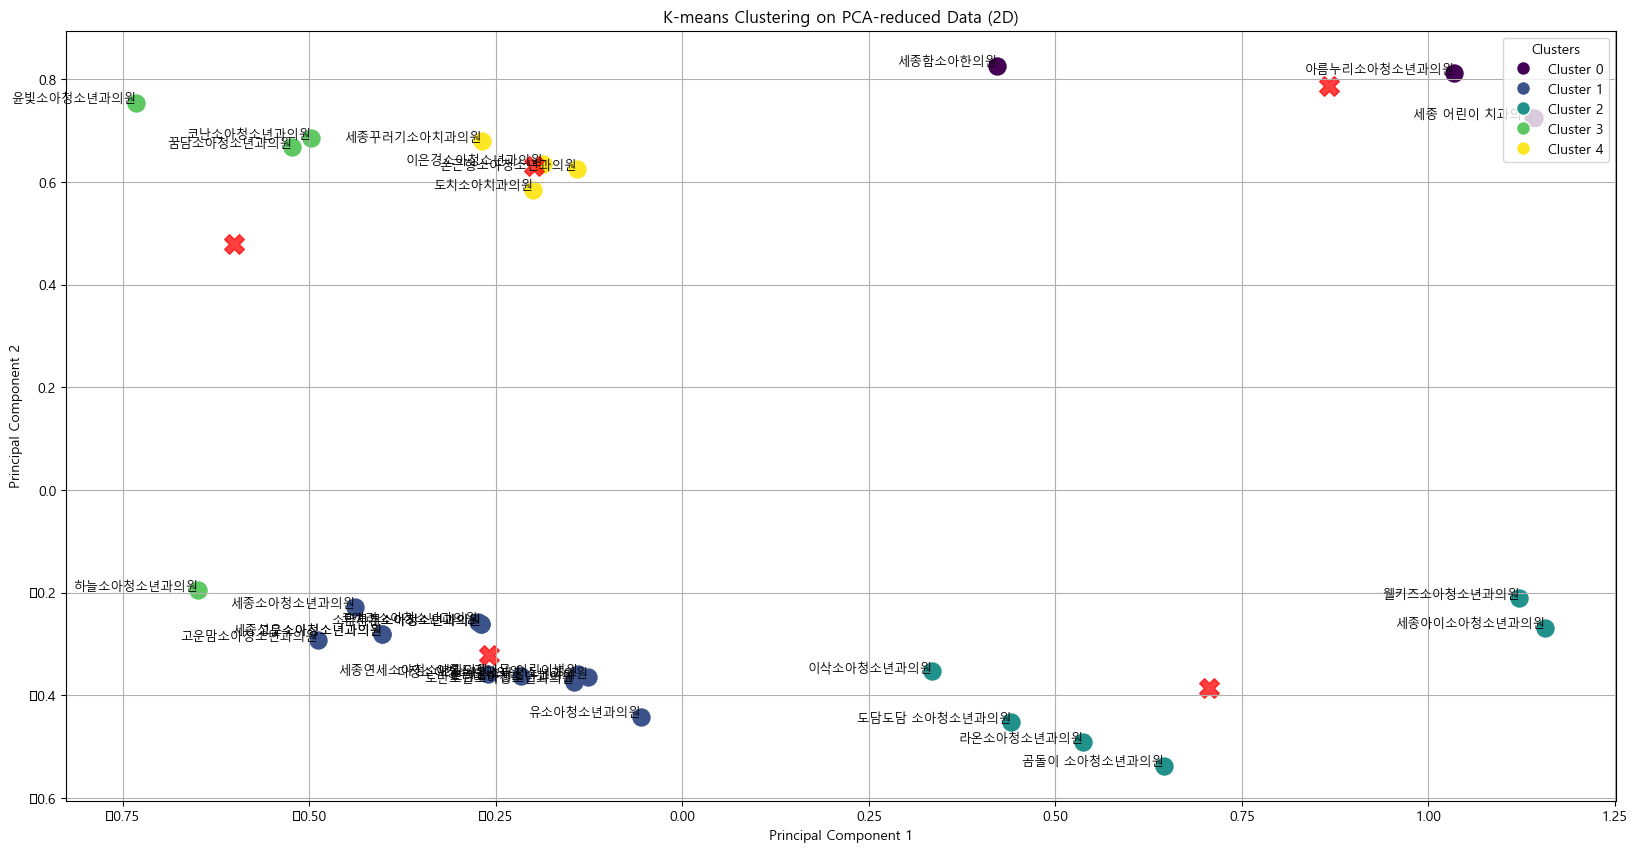

Explained variance ratio of PCA components: [0.32132057 0.26682828 0.13137675 0.09025757]


In [61]:
# 2D 시각화
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

# 산점도 그리기
for cluster in range(n_clusters):
    ax.scatter(X_pca[features['Cluster'] == cluster, 0],
               X_pca[features['Cluster'] == cluster, 1],
               color=colors[cluster],
               label=f'Cluster {cluster + 1}',
               s=150)

# 클러스터 센터 표시
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')

# 레이블 추가
for i, txt in enumerate(hos_feature['의료기관명']):
    ax.text(X_pca[i, 0], X_pca[i, 1], str(txt), fontsize=9, ha='right')

# 제목 및 축 레이블 설정
ax.set_title('K-means Clustering on PCA-reduced Data (2D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.grid()

# 범례 추가
legend_elements = [Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=colors[cluster],
                          markersize=10, label=f'Cluster {cluster}') for cluster in range(n_clusters)]
ax.legend(handles=legend_elements, title='Clusters', loc='upper right')
plt.show()

# PCA 결과의 설명력 출력
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance ratio of PCA components: {explained_variance}")



### 주성분 관련 기여도

PCA Components (Feature Contributions):
       Untact     Night    Sunday    School  Carecenter       Apt  Population  \
PC1 -0.005464  0.714305  0.543245  0.283219    0.160570  0.181888   -0.024628   
PC2 -0.938502 -0.104009  0.252768 -0.176596   -0.058250 -0.016685   -0.022370   
PC3  0.046580  0.506370  0.001284 -0.414599   -0.340948 -0.336141   -0.009810   
PC4  0.085177  0.088296 -0.077414 -0.447984   -0.129688  0.072661   -0.743759   

        Birth         I  
PC1 -0.143788  0.185106  
PC2  0.088968  0.035098  
PC3  0.186075 -0.552783  
PC4 -0.099217  0.439484  


C:\Users\dknmk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


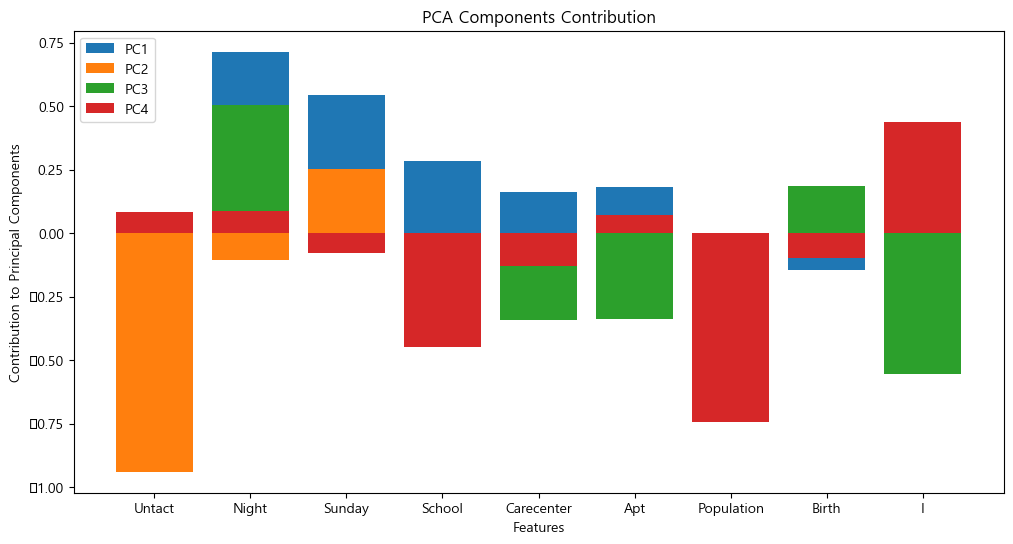

In [62]:
# PCA의 주성분 구성 요소 출력
pca_components = pca.components_
feature_names = features.columns[:-1]

# 주성분에 대한 기여도 DataFrame 생성
components_df = pd.DataFrame(pca_components, columns=feature_names)
components_df.index = [f'PC{i+1}' for i in range(components_df.shape[0])]

print("PCA Components (Feature Contributions):")
print(components_df)

# 각 주성분에 대한 기여도를 시각화
plt.figure(figsize=(12, 6))
for i in range(components_df.shape[0]):
    plt.bar(components_df.columns, components_df.iloc[i], label=f'PC{i+1}')

plt.title('PCA Components Contribution')
plt.xlabel('Features')
plt.ylabel('Contribution to Principal Components')
plt.legend()
plt.xticks()
plt.show()

In [63]:
# 각 주성분에서 가장 영향력 있는 feature 찾기

for i in range(components_df.shape[0]):
    # 기여도의 절댓값을 기준으로 정렬
    contribution = components_df.iloc[i].abs()
    most_influential_feature = contribution.idxmax()  # 가장 큰 기여도를 가진 feature
    max_value = contribution.max()  # 해당 feature의 기여도 값
    print(f"PC{i+1}에서 가장 영향력 있는 feature: {most_influential_feature} (기여도: {max_value:.4f})")


PC1에서 가장 영향력 있는 feature: Night (기여도: 0.7143)
PC2에서 가장 영향력 있는 feature: Untact (기여도: 0.9385)
PC3에서 가장 영향력 있는 feature: I (기여도: 0.5528)
PC4에서 가장 영향력 있는 feature: Population (기여도: 0.7438)


## ANOVA


In [64]:
zero=0
one=0
two=0
three=0
four=0

for i, row in features.iterrows():
        if features['Cluster'][i]==0:
                zero+=1
        elif features['Cluster'][i]==1:
                one+=1
        elif features['Cluster'][i]==2:
                two+=1

        elif features['Cluster'][i]==3:
                three+=1

        elif features['Cluster'][i]==4:
                four+=1
        

In [65]:
cluster_num=[0,1,2,3,4]

count_cluster=pd.DataFrame(data=[zero, one, two, three, four])

In [66]:
count_cluster

,0
0,3
1,14
2,6
3,4
4,4


In [67]:
grouped = pd.DataFrame(features.groupby('Cluster').agg(['mean', 'std']))
grouped

Untact          Night             Sunday              School  \
          mean  std      mean      std      mean       std      mean   
Cluster                                                                
0         0.00  0.0  0.666667  0.57735  1.000000  0.000000  0.614583   
1         1.00  0.0  0.000000  0.00000  0.000000  0.000000  0.522321   
2         1.00  0.0  1.000000  0.00000  0.333333  0.516398  0.664062   
3         0.25  0.5  0.000000  0.00000  0.000000  0.000000  0.152344   
4         0.00  0.0  0.000000  0.00000  0.000000  0.000000  0.398438   

                  Carecenter                 Apt           Population  \
              std       mean       std      mean       std       mean   
Cluster                                                                 
0        0.167073   0.400000  0.000000  0.622807  0.030387   0.441951   
1        0.261508   0.357143  0.194992  0.484962  0.185999   0.474698   
2        0.273281   0.466667  0.242212  0.561404  0.204294   0.428682   
3        0.139972   0.150000  0.191485  0.151316  0.149445   0.634301   
4        0.287687   0.500000  0.382971  0.631579  0.264906   0.332983   

                      Birth                   I            
              std      mean       std      mean       std  
Cluster                                                    
0        0.083493  0.443653  0.187301  0.908288  0.079425  
1        0.244095  0.454199  0.133998  0.689598  0.252772  
2        0.226233  0.344879  0.059952  0.592185  0.214600  
3        0.270493  0.822337  0.275390  0.206817  0.138840  
4        0.266568  0.387837  0.283292  0.838750  0.156109

In [68]:
from scipy.stats import shapiro

def check_normality_by_cluster(df, feature_col):
    # Cluster별로 그룹화
    clusters = df['Cluster'].unique()
    
    # 각 클러스터에 대해 정규성 검사
    for cluster in clusters:
        group_data = df[df['Cluster'] == cluster][feature_col]
        stat, p_value = shapiro(group_data)
        if p_value > 0.05:
            print(f"Cluster {cluster} - {feature_col}: 정규 분포를 따릅니다. (p-value = {p_value:.3f})")
        else:
            print(f"Cluster {cluster} - {feature_col}: 정규 분포를 따르지 않습니다. (p-value = {p_value:.3f})")

# features 데이터프레임에서 각 feature에 대해 정규성 검정 수행
for feature in features.columns[:-1]:  # 마지막 열은 'Cluster'이므로 제외
    check_normality_by_cluster(features, feature)

Cluster 1 - Untact: 정규 분포를 따릅니다. (p-value = 1.000)
Cluster 3 - Untact: 정규 분포를 따르지 않습니다. (p-value = 0.001)
Cluster 4 - Untact: 정규 분포를 따릅니다. (p-value = 1.000)
Cluster 0 - Untact: 정규 분포를 따릅니다. (p-value = 1.000)
Cluster 2 - Untact: 정규 분포를 따릅니다. (p-value = 1.000)
Cluster 1 - Night: 정규 분포를 따릅니다. (p-value = 1.000)
Cluster 3 - Night: 정규 분포를 따릅니다. (p-value = 1.000)
Cluster 4 - Night: 정규 분포를 따릅니다. (p-value = 1.000)
Cluster 0 - Night: 정규 분포를 따르지 않습니다. (p-value = -0.000)
Cluster 2 - Night: 정규 분포를 따릅니다. (p-value = 1.000)
Cluster 1 - Sunday: 정규 분포를 따릅니다. (p-value = 1.000)
Cluster 3 - Sunday: 정규 분포를 따릅니다. (p-value = 1.000)
Cluster 4 - Sunday: 정규 분포를 따릅니다. (p-value = 1.000)
Cluster 0 - Sunday: 정규 분포를 따릅니다. (p-value = 1.000)
Cluster 2 - Sunday: 정규 분포를 따르지 않습니다. (p-value = 0.001)
Cluster 1 - School: 정규 분포를 따릅니다. (p-value = 0.568)
Cluster 3 - School: 정규 분포를 따릅니다. (p-value = 0.810)
Cluster 4 - School: 정규 분포를 따릅니다. (p-value = 0.720)
Cluster 0 - School: 정규 분포를 따릅니다. (p-value = 0.089)
Cluster 2 - School: 정규 

C:\Users\dknmk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_morestats.py:1813: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [69]:
import numpy as np
from scipy.stats import shapiro

# 로그 변환 함수
def log_transform(df, feature_col):
    # 로그 변환 (0 이상의 값에 대해서만 가능하므로 +1을 추가)
    df[feature_col] = np.log(df[feature_col] + 1)

# 정규성 검사 함수 (변환 후)
def check_normality_after_transformation(df, feature_col):
    clusters = df['Cluster'].unique()
    
    # 각 클러스터별로 변환된 데이터에 대해 정규성 검정
    for cluster in clusters:
        group_data = df[df['Cluster'] == cluster][feature_col]
        stat, p_value = shapiro(group_data)
        if p_value > 0.05:
            print(f"Cluster {cluster} - {feature_col}: 정규 분포를 따릅니다. (p-value = {p_value:.3f})")
        else:
            print(f"Cluster {cluster} - {feature_col}: 정규 분포를 따르지 않습니다. (p-value = {p_value:.3f})")

# 'features' 데이터프레임에서 각 feature에 대해 로그 변환 후 정규성 검사
for feature in features.columns[:-1]:  # 마지막 열인 'Cluster' 제외
    log_transform(features, feature)  # 로그 변환
    check_normality_after_transformation(features, feature)  # 변환 후 정규성 검정


Cluster 1 - Untact: 정규 분포를 따릅니다. (p-value = 1.000)
Cluster 3 - Untact: 정규 분포를 따르지 않습니다. (p-value = 0.001)
Cluster 4 - Untact: 정규 분포를 따릅니다. (p-value = 1.000)
Cluster 0 - Untact: 정규 분포를 따릅니다. (p-value = 1.000)
Cluster 2 - Untact: 정규 분포를 따릅니다. (p-value = 1.000)
Cluster 1 - Night: 정규 분포를 따릅니다. (p-value = 1.000)
Cluster 3 - Night: 정규 분포를 따릅니다. (p-value = 1.000)
Cluster 4 - Night: 정규 분포를 따릅니다. (p-value = 1.000)
Cluster 0 - Night: 정규 분포를 따르지 않습니다. (p-value = -0.000)
Cluster 2 - Night: 정규 분포를 따릅니다. (p-value = 1.000)
Cluster 1 - Sunday: 정규 분포를 따릅니다. (p-value = 1.000)
Cluster 3 - Sunday: 정규 분포를 따릅니다. (p-value = 1.000)
Cluster 4 - Sunday: 정규 분포를 따릅니다. (p-value = 1.000)
Cluster 0 - Sunday: 정규 분포를 따릅니다. (p-value = 1.000)
Cluster 2 - Sunday: 정규 분포를 따르지 않습니다. (p-value = 0.001)
Cluster 1 - School: 정규 분포를 따릅니다. (p-value = 0.564)
Cluster 3 - School: 정규 분포를 따릅니다. (p-value = 0.815)
Cluster 4 - School: 정규 분포를 따릅니다. (p-value = 0.739)
Cluster 0 - School: 정규 분포를 따릅니다. (p-value = 0.082)
Cluster 2 - School: 정규 

In [78]:
del results_df

In [83]:
import pandas as pd
from scipy.stats import kruskal

# Kruskal-Wallis 검정을 수행하고 결과를 DataFrame에 저장하는 함수
def perform_kruskal(df, feature_col):
    clusters = df['Cluster'].unique()
    
    # 각 클러스터별로 그룹을 나누어 Kruskal-Wallis 검정 수행
    groups = [df[df['Cluster'] == cluster][feature_col] for cluster in clusters]
    
    # H-통계량과 p-value 계산
    h_stat, p_value = kruskal(*groups)
    
    # 결과를 반환
    return h_stat, p_value

# 결과를 저장할 빈 데이터프레임 생성
results_df = pd.DataFrame(columns=['Feature', 'H-Statistic', 'p-value', 'Significant Difference'])

# 'features' 데이터프레임에서 각 feature에 대해 Kruskal-Wallis 검정 수행
for feature in features.columns[:-1]:  # 마지막 열인 'Cluster' 제외
    h_stat, p_value = perform_kruskal(features, feature)
    
    # 유의미한 차이 여부를 'Yes' 또는 'No'로 기록
    significance = "YES" if p_value < 0.05 else "no"
    
    # 결과를 데이터프레임에 추가
    results_df = results_df.append({
        'Feature': feature,
        'H-Statistic': h_stat,
        'p-value': p_value,
        'Significant Difference': significance
    }, ignore_index=True)

# 결과 출력
print(results_df)

      Feature  H-Statistic   p-value Significant Difference
0      Untact    26.678571  0.000023                    YES
1       Night    26.630435  0.000024                    YES
2      Sunday    20.461538  0.000405                    YES
3      School     8.518744  0.074321                     no
4  Carecenter     5.469164  0.242453                     no
5         Apt    11.261527  0.023777                    YES
6  Population     3.067068  0.546665                     no
7       Birth     8.761190  0.067354                     no
8           I    14.282725  0.006445                    YES


C:\Users\dknmk\AppData\Local\Temp\ipykernel_41104\142711765.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\dknmk\AppData\Local\Temp\ipykernel_41104\142711765.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\dknmk\AppData\Local\Temp\ipykernel_41104\142711765.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\dknmk\AppData\Local\Temp\ipykernel_41104\142711765.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\dknmk\AppData\Local\Temp\ipykernel_41104\142711765.

In [84]:
import pandas as pd
from scipy.stats import mannwhitneyu
from itertools import combinations

# Kruskal-Wallis 결과가 유의미한 feature에 대해 Mann-Whitney U 사후 검정을 수행하는 함수
def perform_mannwhitney(df, feature, cluster_col='Cluster'):
    clusters = df[cluster_col].unique()
    pairwise_results = []

    # 각 클러스터 쌍별로 Mann-Whitney U 검정 수행
    for cluster1, cluster2 in combinations(clusters, 2):
        data1 = df[df[cluster_col] == cluster1][feature]
        data2 = df[df[cluster_col] == cluster2][feature]

        u_stat, p_value = mannwhitneyu(data1, data2, alternative='two-sided')

        pairwise_results.append({
            'Feature': feature,
            'Cluster1': cluster1,
            'Cluster2': cluster2,
            'U-Statistic': u_stat,
            'p-value': p_value
        })

    return pairwise_results

# 유의미한 Kruskal-Wallis 결과가 저장된 results_df에서 유의미한 feature에 대해 사후 검정 수행
significant_features = results_df[results_df['p-value'] < 0.05]['Feature'].unique()
pairwise_results = []

for feature in significant_features:
    pairwise_results.extend(perform_mannwhitney(features, feature))

# 사후 검정 결과를 데이터프레임으로 저장
pairwise_results_df = pd.DataFrame(pairwise_results)

# Bonferroni 보정을 통한 p-value 수정 (다중 비교 문제 해결)
pairwise_results_df['Adjusted p-value'] = pairwise_results_df['p-value'] * len(pairwise_results_df)
pairwise_results_df['Significant'] = pairwise_results_df['Adjusted p-value'] < 0.05

# 최종 결과 출력
pairwise_results_df


,Feature,Cluster1,Cluster2,U-Statistic,p-value,Adjusted p-value,Significant
0,Untact,1,3,49.0,0.000759,0.037926,True
1,Untact,1,4,56.0,0.000051,0.002567,True
2,Untact,1,0,42.0,0.000094,0.004716,True
3,Untact,1,2,42.0,1.000000,50.000000,False
4,Untact,3,4,10.0,0.453255,22.662735,False
5,Untact,3,0,7.5,0.563703,28.185143,False
6,Untact,3,2,3.0,0.023103,1.155170,False
7,Untact,4,0,6.0,1.000000,50.000000,False
8,Untact,4,2,0.0,0.004040,0.202014,False
9,Untact,0,2,0.0,0.007556,0.377799,False


In [85]:
# Significant가 True인 행들만 필터링
significant_results_df = pairwise_results_df[pairwise_results_df['Significant'] == True]

# 최종 결과 출력
significant_results_df

,Feature,Cluster1,Cluster2,U-Statistic,p-value,Adjusted p-value,Significant
0,Untact,1,3,49.0,0.000759,0.037926,True
1,Untact,1,4,56.0,0.000051,0.002567,True
2,Untact,1,0,42.0,0.000094,0.004716,True
13,Night,1,2,0.0,0.000017,0.000827,True
22,Sunday,1,0,0.0,0.000094,0.004716,True


In [71]:
anova_results = {}
for feature in features.columns[:-1].tolist():
    groups = [features[features['Cluster'] == i][feature] for i in range(5)]
    f_stat, p_value = stats.f_oneway(*groups)
    anova_results[feature] = (f_stat, p_value)

# ANOVA 결과 출력
for feature, (f_stat, p_value) in anova_results.items():
    print(f"{feature}: F-statistic = {f_stat:.4f}, p-value = {p_value:.4f}")


Untact: F-statistic = 52.2097, p-value = 0.0000
Night: F-statistic = 51.3710, p-value = 0.0000
Sunday: F-statistic = 13.9435, p-value = 0.0000
School: F-statistic = 3.4478, p-value = 0.0218
Carecenter: F-statistic = 2.0227, p-value = 0.1207
Apt: F-statistic = 5.7266, p-value = 0.0019
Population: F-statistic = 0.7688, p-value = 0.5553
Birth: F-statistic = 4.1873, p-value = 0.0095
I: F-statistic = 6.9728, p-value = 0.0006


결과: 


## Folium 시각화

In [106]:
features['Latitude']=hos_feature['Latitude']
features['Longitude']=hos_feature['Longitude']
features['의료기관명']=hos_feature['의료기관명']

In [131]:
# Folium 지도 생성
m = folium.Map(location=[features['Latitude'].mean(), features['Longitude'].mean()], zoom_start=12)

In [132]:
count=0
for i, row in features.iterrows():
    folium.CircleMarker(
        location=(row['Latitude'], row['Longitude']),
        radius=15,
        color=cluster_colors[row['Cluster']],  # 클러스터 색상 적용
        fill=True,
        fill_color=cluster_colors[row['Cluster']],
        fill_opacity=0.6,
        popup=row['의료기관명']
    ).add_to(m)
    # print(f'{row['의료기관명']} 추가됨')
    print(f"{row['의료기관명']} 추가됨")
    count+=1
print(count)


아름드리나무 어린이병원 추가됨
코난소아청소년과의원 추가됨
꿈담소아청소년과의원 추가됨
손근형소아청소년과의원 추가됨
윤빛소아청소년과의원 추가됨
세종꾸러기소아치과의원 추가됨
하늘소아청소년과의원 추가됨
로뎀소아청소년과의원 추가됨
다정소아청소년과의원 추가됨
도란도란소아청소년과의원 추가됨
아름누리소아청소년과의원 추가됨
도치소아치과의원 추가됨
코끼리소아청소년과의원 추가됨
고운소아청소년과의원 추가됨
소담튼튼소아청소년과의원 추가됨
무지개소아청소년과의원 추가됨
세종연세소아청소년과의원 추가됨
세종성모소아청소년과의원 추가됨
라온소아청소년과의원 추가됨
유소아청소년과의원 추가됨
세종함소아한의원 추가됨
고운맘소아청소년과의원 추가됨
웰키즈소아청소년과의원 추가됨
도담도담 소아청소년과의원 추가됨
세종 어린이 치과의원 추가됨
세움소아청소년과의원 추가됨
세종아이소아청소년과의원 추가됨
이삭소아청소년과의원 추가됨
곰돌이 소아청소년과의원 추가됨
세종소아청소년과의원 추가됨
이은경소아청소년과의원 추가됨
31


In [133]:
folium.CircleMarker(
        location=(features['Latitude'][5], features['Longitude'][5]),
        radius=15,
        color=cluster_colors[features['Cluster'][5]],  # 클러스터 색상 적용
        fill=True,
        fill_color=cluster_colors[features['Cluster'][5]],
        fill_opacity=0.6,
        popup=features['의료기관명'][5]
    ).add_to(m)

In [134]:
legend_html = f'''
     <div style="
     position: fixed;
     bottom: 50px;
     left: 50px;
     width: 150px;
     height: {50 * n_clusters}px;
     background-color: white;
     border:2px solid grey;
     z-index:9999;
     font-size:14px;">
     <h4 style="margin:10px;"><b>Cluster Legend</b></h4>
     '''

for i in range(n_clusters):
    legend_html += f'''
     <div style="display: flex; align-items: center; margin: 5px;">
         <div style="background-color: {cluster_colors[i]}; width: 20px; height: 20px; margin-right: 10px;"></div>
         Cluster {i}
     </div>
     '''
legend_html += '</div>'
m.get_root().html.add_child(folium.Element(legend_html))

In [135]:
# 지도 표시
m.save('세종특별자치시 소아과 입지 분석 최종.html')
m

In [103]:
with open("세종특별자치시 소아과 입지 분석.html", "r", encoding='utf-8') as f:
    map_html = f.read()

In [98]:
map_html = map_html.replace('<div class="folium-map" ', '<div class="folium-map" style="width: 1800px; height: 1000px; "')

# 수정된 HTML 파일 저장
with open("map_resized.html", "w") as f:
    f.write(map_html)

In [107]:
for i in range(len(features['Cluster'])):
    if features['Cluster'][i]==4:
        print(features['의료기관명'][i])

손근형소아청소년과의원
세종꾸러기소아치과의원
도치소아치과의원
이은경소아청소년과의원
